https://hyunicecream.tistory.com/79

# 파이토치(PyTorch란?)
- PyTorch는 머신러닝 프레임워크 입니다.
  - PyTorch의 Tensor는 Numpy배열과 매우 흡사합니다.
- PyTorch를 사용하면 GPU 연동을 통해 효율적으로 딥러닝 모델을 학습할 수 있습니다.

In [2]:
import torch

## 1) GPU 사용여부 체크하기
- Colab 기준 **[수정 - 노트설정 - 하드웨어 가속기]**를 GPU로 바꿔줍니다.

In [3]:
# data = [[1, 2],
#         [3, 4]]

# x = torch.tensor(data)
# print(x.is_cuda)

# # Tensor를 GPU로 옮기기
# x = x.cuda()
# print(x.is_cuda)

# # Tensor를 CPU로 옮기기
# x = x.cpu()
# print(x.is_cuda)

맥북에서는 위 코드 실행 불가

In [4]:
# Apple Silicon 기반의 MacBook에서는 CUDA가 지원되지 않으므로, GPU 가속을 위해 **MPS(Metal Performance Shaders)**를 사용해야 합니다. 
# 따라서 코드를 MPS를 사용할 수 있도록 변경하는 방식으로 수정해야 합니다. 또한, CPU에서 실행할 경우도 대비할 수 있도록 코드를 작성할 수 있습니다.

# 다음은 MPS와 CPU를 함께 사용할 수 있도록 수정된 코드입니다:

import torch

# 데이터 생성
data = [[1, 2],
        [3, 4]]

# 텐서 생성
x = torch.tensor(data)

# MPS(Apple Silicon GPU 가속) 또는 CPU 사용 결정
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("MPS 가속을 사용합니다.")
else:
    device = torch.device("cpu")
    print("MPS 가속을 사용할 수 없습니다. CPU를 사용합니다.")

# Tensor가 GPU(MPS)인지 확인 (초기에는 CPU에 있음)
print("초기 상태 (CPU):", x.is_cuda)

# Tensor를 GPU(MPS)로 옮기기 (또는 CPU로 유지)
x = x.to(device)
print("MPS 상태 확인:", x.device)

# Tensor를 다시 CPU로 옮기기
x = x.cpu()
print("다시 CPU로 옮김:", x.is_cuda)  # False가 출력됨



# 출력 예시:
# MPS 가속을 사용할 수 있는 환경에서는 MPS 가속을 사용합니다.라는 메시지가 출력되고, 텐서가 MPS로 옮겨집니다.
# MPS가 없는 환경에서는 MPS 가속을 사용할 수 없습니다. CPU를 사용합니다.라는 메시지가 출력되고 텐서가 CPU에 남아있습니다.

MPS 가속을 사용합니다.
초기 상태 (CPU): False
MPS 상태 확인: mps:0
다시 CPU로 옮김: False


서로 다른 장치(device)에 있는 텐서끼리 연산을 수행하면 오류가 발생합니다.

# 텐서 생성하기
- PyTorch의 텐서(tensor)는 기능적으로 넘파이(numpy)와 매우 유사합니다.
- 기본적으로 **다차원 배열**을 처리하기에 적합한 자료구조로 이해할 수 있습니다.
- PyTorch의 텐서는 **"자동 미분"**기능을 제공합니다.

PyTorch에서 "텐서(Tensor)"는 기본적으로 다차원 배열(multi-dimensional array) 또는 행렬의 일반화된 형태를 의미합니다. 

텐서는 데이터를 저장하고 처리하는 기본 단위이며, 벡터, 행렬, 그리고 더 높은 차원의 데이터를 모두 표현할 수 있습니다. 

PyTorch에서 텐서는 주로 수치 계산을 위해 사용되며, GPU를 활용한 병렬 계산을 통해 고속 연산이 가능합니다.

## 1) 텐서의 속성
- 텐서의 기본 속성은 다음과 같습니다.
  - 모양(shape)
  - 자료형(data type)
  - 저장된 장치(device)

In [5]:
tensor = torch.rand(3, 4)

print(tensor)
print(f"Shape : {tensor.shape}")
print(f"Data Type : {tensor.dtype}")
print(f"Device : {tensor.device}")

tensor([[0.4555, 0.1537, 0.4372, 0.9650],
        [0.3271, 0.6235, 0.2301, 0.1456],
        [0.0862, 0.4208, 0.5036, 0.9807]])
Shape : torch.Size([3, 4])
Data Type : torch.float32
Device : cpu


## 2) 텐서 생성하기
- 파이썬의 `list`에서 직접 텐서를 생성할 수 있습니다.

In [6]:
data = [[1, 2],
        [3, 4]]

x = torch.tensor(data)
print(x)

tensor([[1, 2],
        [3, 4]])


- numpy 배열에서 텐서를 생성할 수 있습니다.

In [7]:
a = torch.tensor([5])
b = torch.tensor([7])

c = (a + b).numpy()
print(type(c))

<class 'numpy.ndarray'>


In [8]:
result = c * 10
tensor = torch.from_numpy(result)
print(tensor)
print(type(tensor))

tensor([120])
<class 'torch.Tensor'>


## 3) 다른 텐서로부터 텐서 초기화 하기
- 다른 텐서의 정보를 토대로 텐서를 초기화 할 수 있습니다.
- **텐서의 속성**이란? 모양(shape)과 자료형(data type)을 일컫습니다.

In [9]:
x = torch.tensor([[5, 7],
                  [1, 2]])

# 텐서 x와 같은 모양을 가지지만, 값이 1인 텐서 생성하기
x_ones = torch.ones_like(x)
print(x_ones)

tensor([[1, 1],
        [1, 1]])


In [10]:
# 텐서 x와 같은 모양을 가지지만, 자료형을 float으로, 값은 랜덤하게 채우기
x_rand = torch.rand_like(x, dtype=torch.float32) # uniform distribution [0, 1]
print(x_rand)

tensor([[0.5115, 0.5716],
        [0.3646, 0.2870]])


# 텐서의 형변환 및 차원 조작
- 텐서는 넘파이 배열처럼 조작이 가능합니다.

## 1) 텐서의 특정 차원에 접근하기
- 텐서의 원하는 차원에 접근할 수 있습니다.

In [11]:
tensor = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

print(tensor[0])
print(tensor[:, 0])
print(tensor[..., -1])
print(tensor[:, -1])

tensor([1, 2, 3, 4])
tensor([1, 5, 9])
tensor([ 4,  8, 12])
tensor([ 4,  8, 12])


> print(tensor[..., -1])
모든 차원에 대해 마지막 값을 선택합니다.

...는 전체 차원을 의미하며, 마지막 차원에 대해 마지막 요소를 선택합니다.

이 경우, 텐서는 2차원이므로 각 행에서 마지막 열을 선택하는 것과 같습니다.

> print(tensor[:, -1])

이 구문도 모든 행에서 마지막 열을 선택하는 역할을 합니다.

:는 전체 행을 의미하고, -1은 마지막 열을 의미합니다.


> **:와 ...의 차이**


 - :는 특정 차원을 명시적으로 선택할 때 사용됩니다. 

예를 들어 tensor[:, -1]은 "모든 행에서 마지막 열"을 선택하는 것이며, 2차원 텐서에서 명시적으로 2차원의 각 요소를 다룹니다.

- ...(ellipsis)는 여러 차원을 자동으로 처리할 수 있도록 돕습니다. 

다차원 텐서에서 어디에 위치한 차원이든 마지막 차원의 마지막 요소를 선택할 수 있습니다. 

예를 들어, 3차원, 4차원 또는 더 높은 차원에서 사용할 때도 일관된 방식으로 동작합니다.

## 2) 텐서 이어붙이기
-텐서를 이어서 새로운 텐서를 만들 수 있습니다.

### 2-1) cat
단순하게 텐서를 축(dim)에 맞춰 연결합니다.

In [12]:
tensor1 = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

tensor2 = torch.tensor([
    [13, 14, 15, 16],
    [17, 18, 19, 20],
    [21, 22, 23, 24]
])

# dim : 텐서의 축
# 0번 축을 기준으로 이어 붙입니다.
result = torch.cat([tensor1, tensor2], dim=0)
print(result)

print()
# 1번 축을 기준으로 이어 붙입니다.
result = torch.cat([tensor1, tensor2], dim=1)
print(result)

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]])

tensor([[ 1,  2,  3,  4, 13, 14, 15, 16],
        [ 5,  6,  7,  8, 17, 18, 19, 20],
        [ 9, 10, 11, 12, 21, 22, 23, 24]])


이어 붙이기

### 2-2) stack
리스트 내의 텐서를 쌓아줍니다. 차원수가 증가합니다. 예를 들어 2차원 배열과 2차원 배열을 쌓은 3차원 배열을 만들어 줍니다.

In [13]:
tensor1 = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

tensor2 = torch.tensor([
    [13, 14, 15, 16],
    [17, 18, 19, 20],
    [21, 22, 23, 24]
])

tensor3 = torch.stack([tensor1, tensor2])
tensor3

tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],

        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]])

뒤에 쌓기

## 3) 텐서 자르기(slice)

In [14]:
tensor1 = torch.tensor([[1,2,3,4],
                        [5,6,7,8]])

tensor2 = tensor1[:, 0]
print(tensor2)

tensor([1, 5])


In [15]:
tensor3 = tensor1[:, 1:3:2]
print(tensor3)

tensor([[2],
        [6]])


> 이 구문에서 1:3:2는 다음을 의미합니다:

1: 슬라이싱의 시작 인덱스입니다. 여기서는 인덱스 1부터 슬라이싱을 시작합니다.

3: 슬라이싱의 끝 인덱스로, 이 인덱스는 포함되지 않습니다. 즉, 인덱스 3 전까지 선택합니다.

2: 스텝(step) 값으로, 슬라이싱할 때 몇 개씩 건너뛰는지를 나타냅니다. 여기서는 2칸씩 건너뛰며 선택합니다.

> 따라서 1:3:2는 "인덱스 1부터 인덱스 3 전까지, 2칸씩 건너뛰면서" 요소를 선택하는 슬라이싱 방식입니다.

In [16]:
tensor3 = tensor1[0, 1:3]
print(tensor3)

tensor([2, 3])


In [17]:
tensor1 = torch.tensor([[[1, 2],
                         [3, 4]],

                        [[5, 6],
                         [7, 8]],

                        [[9, 10],
                         [11,12]]])

print(tensor1[0])
print(tensor1[0, :])
print(tensor1[0, :, 0])

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]])
tensor([1, 3])


In [18]:
print(tensor1[-1])
print(tensor1[-1, :])
print(tensor1[-1, :, :])

tensor([[ 9, 10],
        [11, 12]])
tensor([[ 9, 10],
        [11, 12]])
tensor([[ 9, 10],
        [11, 12]])


In [19]:
print(tensor1[1:3, :, :].shape)
print(tensor1[:, 1, :].shape)
print(tensor1[:, :-1, :].shape)

torch.Size([2, 2, 2])
torch.Size([3, 2])
torch.Size([3, 1, 2])


### 3-1) split
지정한 size만큼 tensor를 쪼개어 줍니다.

In [20]:
tensor1 = torch.rand(17, 4)

splits = tensor1.split(4, dim=0)
for s in splits:
  print(s.shape)

torch.Size([4, 4])
torch.Size([4, 4])
torch.Size([4, 4])
torch.Size([4, 4])
torch.Size([1, 4])


### 3-2) chunk
지정한 개수만큼 쪼개어진 텐서를 만들어 냅니다.

In [21]:
tensor1 = torch.rand(17, 4)

chunks = tensor1.chunk(4, dim=0)
for c in chunks:
  print(c.shape)

# chunk(num_chunks, dim): 텐서를 지정된 차원(dim)을 기준으로 num_chunks 개의 조각으로 나누는 함수입니다.
# 균등하게 나누려고 하지만 나머지가 있는 경우 일부 조각이 더 많은 크기를 가질 수 있습니다.
# 슬라이싱과는 다르게 조각의 개수로 나누는 것이 핵심입니다.

torch.Size([5, 4])
torch.Size([5, 4])
torch.Size([5, 4])
torch.Size([2, 4])


### 3-3) index_select
인덱스를 이용해 해당 위치의 텐서를 참조합니다.

In [22]:
tensor1 = torch.tensor([[[1, 2],
                         [3, 4]],

                        [[5, 6],
                         [7, 8]],

                        [[9, 10],
                         [11,12]]])

indice = torch.tensor([2, 0])
print(indice)

tensor2 = tensor1.index_select(dim=0, index=indice)
print(tensor2)

tensor([2, 0])
tensor([[[ 9, 10],
         [11, 12]],

        [[ 1,  2],
         [ 3,  4]]])


## 4) 텐서 형변환(type casting)
- 텐서의 자료형을 변환할 수 있습니다.

In [23]:
tensor1 = torch.tensor([2], dtype=torch.int)
tensor2 = torch.tensor([5.0])

print(tensor1.dtype)
print(tensor2.dtype)

torch.int32
torch.float32


In [24]:
print(tensor1 + tensor2)
print((tensor1 + tensor2).dtype)

tensor([7.])
torch.float32


In [25]:
print((tensor1 + tensor2.type(torch.int)))

tensor([7], dtype=torch.int32)


## 5) 텐서의 모양 변경

### 5-1) view
- 텐서를 원하는 개수로 각 차원에 매핑하여 텐서의 차원을 시킬 수 있습니다.

In [26]:
tensor1 = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8])

In [27]:
tensor2 = tensor1.view(4, 2)

print(f"tensor1 : {tensor1}")
print(f"tensor2 : {tensor2}")

tensor1 : tensor([1, 2, 3, 4, 5, 6, 7, 8])
tensor2 : tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])


In [28]:
# tensor1의 값을 변경하면 tensor2도 변경이 된다.
tensor1[0] = 7
print(tensor2)

tensor([[7, 2],
        [3, 4],
        [5, 6],
        [7, 8]])


"tensor1의 값을 변경하면 tensor2도 변경이 된다."

위 내용을 이해하려면, 메모리 구조를 이해해야 함(아래 내용 참고)

tensor1과 tensor2의 관계는 C 언어에서 포인터가 가리키는 메모리와 유사합니다. 


구체적으로는, tensor2는 tensor1과 동일한 데이터를 다른 방식으로 해석한 **뷰(view)**에 불과합니다.

-----------------------------
PyTorch에서 view() 메소드는 새로운 텐서를 생성하는 것이 아니라, 기존 텐서의 메모리 레이아웃을 변경해서 반환합니다.


즉, 메모리 공간을 공유하게 됩니다. C 언어에서 포인터가 가리키는 메모리를 변경하면 그 포인터를 사용하는 다른 참조들도 영향을 받는 것처럼, tensor1의 데이터를 


변경하면 그 데이터를 기반으로 하는 tensor2도 영향을 받습니다.

-----------------------------
이것이 발생하는 이유는 두 텐서가 같은 메모리 주소를 참조하기 때문입니다. 


그래서 tensor1의 값을 변경하면 같은 메모리 공간을 공유하는 tensor2의 값도 변경되는 것입니다.

-----------------------------

이 현상을 피하려면 tensor2를 완전히 새로운 복사본으로 만들어야 합니다. 예를 들어, clone() 메소드를 사용하여 메모리를 따로 복사할 수 있습니다:

In [29]:
# tensor1을 복사하여 변경하면 tensor1을 변경해도 tensor2는 변경이 안된다.
tensor3 = tensor1.clone().view(4, 2)
tensor1[0] = 20

print(tensor3)

tensor([[7, 2],
        [3, 4],
        [5, 6],
        [7, 8]])


In [30]:
# -1을 이용하면 비워져 있는 차원의 값이 적절하게 채워진다.
tensor4 = tensor1.view(-1, 4)
print(tensor4)

tensor([[20,  2,  3,  4],
        [ 5,  6,  7,  8]])


### 5-2) reshape
- view()와 비슷하나, 텐서가 메모리 상에 연속적이지 않아도(not contiguous) shape이 변경 됩니다.

In [31]:
tensor1 = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8])

In [32]:
tensor2 = tensor1.reshape(4, 2)

print(f"tensor2 : {tensor2}")

tensor2 : tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])


> view(): 

원본 텐서가 메모리에서 연속적인 경우, 데이터를 공유하며 원본 텐서에 영향을 미칩니다. 

즉, view()로 만든 텐서를 수정하면 원본 텐서도 바뀔 수 있습니다.

-------------------------------


> reshape(): 

가능한 경우 view()처럼 데이터를 공유하지만, 원본 텐서가 연속적이지 않다면 새로운 메모리 공간을 할당하여 데이터를 복사합니다. 

따라서 원본 텐서와 데이터를 공유하지 않을 수 있으며, 원본에 영향을 주지 않습니다.

# 텐서의 연산

In [33]:
a = torch.tensor([[1, 2],
                  [3, 4]])

b = torch.tensor([[2, 2],
                  [3, 3]])

In [34]:
print(a + b)

tensor([[3, 4],
        [6, 7]])


In [35]:
print(a - b)

tensor([[-1,  0],
        [ 0,  1]])


In [36]:
print(a * b)

tensor([[ 2,  4],
        [ 9, 12]])


In [37]:
print(a / b)

tensor([[0.5000, 1.0000],
        [1.0000, 1.3333]])


In [38]:
print( a == b )

tensor([[False,  True],
        [ True, False]])


In [39]:
print( a != b )

tensor([[ True, False],
        [False,  True]])


In [40]:
print( a ** b )

tensor([[ 1,  4],
        [27, 64]])


## Inplace 연산
Inplace 연산은 텐서의 실제 값을 바꿔주는 연산을 의미합니다.

In [41]:
print(a)
print(a.mul(b))
print(a)

tensor([[1, 2],
        [3, 4]])
tensor([[ 2,  4],
        [ 9, 12]])
tensor([[1, 2],
        [3, 4]])


In [42]:
# a와 b의 Element wise product를 수행한 후 도로 a에 넣습니다.
# 연산 함수 뒤에 언더바(_)가 보통 붙습니다.
print(a.mul_(b))
print(a)

tensor([[ 2,  4],
        [ 9, 12]])
tensor([[ 2,  4],
        [ 9, 12]])


## 차원 감소 연산
주로 합계나 평균 등 차원 축에 따라 연산이 된 후 감소가 되는 연산을 의미합니다.

In [43]:
a = torch.tensor([[1, 2],
                  [3, 4]], dtype=torch.float)

# 차원을 따로 지정하지 않으면 텐서 내 모든 데이터에 대한 연산이 이뤄진 후 스칼라 값으로 표현
print(a.sum())
print(a.mean())

tensor(10.)
tensor(2.5000)


In [44]:
# 차원을 따로 지정하면, 지정한 차원에 맞게 연산
print(a.sum(dim=0))
print(a.sum(dim=1))

print()

print(a.mean(dim=0))
print(a.mean(dim=1))

tensor([4., 6.])
tensor([3., 7.])

tensor([2., 3.])
tensor([1.5000, 3.5000])


## 브로드캐스팅
차원 수가 맞지 않아도 자동으로 텐서를 높은 차원으로 확장해 연산이 가능토록 합니다.

In [45]:
a = torch.tensor([[1, 2]])
b = torch.tensor([[3, 4]])

print(a.shape, b.shape)

torch.Size([1, 2]) torch.Size([1, 2])


In [46]:
print(a + b)

tensor([[4, 6]])


### tensor, scalar 연산

In [47]:
a = torch.tensor([[1, 2],
                  [3, 4]])

print(a + 10)

tensor([[11, 12],
        [13, 14]])


### tensor, vector 연산

In [48]:
a = torch.tensor([[1, 2],
                [3, 4]])

b = torch.tensor([10, 20])

print(b.shape)
print(a + b)

torch.Size([2])
tensor([[11, 22],
        [13, 24]])


In [49]:
a = torch.tensor([[1, 2],
                [3, 4]])

b = torch.tensor([[10, 20]])
print(b.shape)
print(a + b)

torch.Size([1, 2])
tensor([[11, 22],
        [13, 24]])


In [50]:
a = torch.tensor([[1, 2],
                [3, 4]])

b = torch.tensor([[10],
                [20]]) 
print(b.shape)
print(a + b)

torch.Size([2, 1])
tensor([[11, 12],
        [23, 24]])


### tensor, tensor 연산

In [51]:
a = torch.tensor([[1, 2]])

b = torch.tensor([[10],
                  [20]])

print(a.shape, b.shape)
print(a + b)

torch.Size([1, 2]) torch.Size([2, 1])
tensor([[11, 12],
        [21, 22]])


In [52]:
a = torch.tensor([[[1, 2],
                   [3, 4]],

                   [[5, 6],
                    [7, 8]],

                   [[9, 10],
                    [11,12]]])

b = torch.tensor([100, 200])

print(a+b)

tensor([[[101, 202],
         [103, 204]],

        [[105, 206],
         [107, 208]],

        [[109, 210],
         [111, 212]]])


In [53]:
a = torch.tensor([[[1, 2],
                   [3, 4]],

                   [[5, 6],
                    [7, 8]],

                   [[9, 10],
                    [11,12]]])

b = torch.tensor([[100, 200],
                  [300, 400]])

print(a+b)

tensor([[[101, 202],
         [303, 404]],

        [[105, 206],
         [307, 408]],

        [[109, 210],
         [311, 412]]])


In [54]:
a = torch.tensor([[[1, 2],
                   [3, 4]],

                   [[5, 6],
                    [7, 8]],

                   [[9, 10],
                    [11,12]]])

b = torch.tensor([[100],
                  [300]])

print(a+b)

tensor([[[101, 102],
         [303, 304]],

        [[105, 106],
         [307, 308]],

        [[109, 110],
         [311, 312]]])


# 파이토치의 여러 함수들

## expand
설정한 차원의 방향으로 텐서를 복사하면서 확장합니다.

In [55]:
x = torch.tensor([[[1, 2]],
                  [[3, 4]]])

print(x.size()) # x.shape과 같다.

torch.Size([2, 1, 2])


In [56]:
y = x.expand(2, 3, 2)
print(y)
print(y.size())

tensor([[[1, 2],
         [1, 2],
         [1, 2]],

        [[3, 4],
         [3, 4],
         [3, 4]]])
torch.Size([2, 3, 2])


In [57]:
# 위의 expand를 cat으로 구현해 보기
z = torch.cat([x, x, x], dim=1)
print(z)
print(z.size())

tensor([[[1, 2],
         [1, 2],
         [1, 2]],

        [[3, 4],
         [3, 4],
         [3, 4]]])
torch.Size([2, 3, 2])


## randperm
설정한 숫자만큼의 무작위 순열을 만들어 냅니다.

In [58]:
x = torch.randperm(10)

print(x)
print(x.shape)

tensor([1, 3, 4, 5, 2, 8, 0, 6, 7, 9])
torch.Size([10])


## argmax
설정한 차원에서 가장 큰 값이 들어있는 인덱스를 반환합니다.

In [59]:
x = torch.randperm(3**3).reshape(3, 3, -1)

print(x)
print(x.size())

tensor([[[ 5, 18,  6],
         [12, 16,  3],
         [ 1, 24,  8]],

        [[23, 20,  7],
         [10,  9, 26],
         [19, 11, 13]],

        [[25, 21,  0],
         [14, 15, 22],
         [ 4, 17,  2]]])
torch.Size([3, 3, 3])


In [60]:
# -1번 방향(스칼라 축)에서 가장 큰 값의 인덱스를 추출하기
y = x.argmax(dim=-1)

print(y)
print(y.size())

tensor([[1, 1, 1],
        [0, 2, 0],
        [0, 2, 1]])
torch.Size([3, 3])


In [61]:
# 1번 방향에서 가장 큰 값의 인덱스를 추출하기
z = x.argmax(dim=1)

print(z)
print(z.size())

tensor([[1, 2, 2],
        [0, 0, 1],
        [0, 0, 1]])
torch.Size([3, 3])


## topk
가장 큰 k개의 값과, 그 값의 인덱스를 튜플 형식으로 반환합니다.

In [62]:
values, indices = torch.topk(x, k=1, dim=-1)

print(values)
print(values.size())

tensor([[[18],
         [16],
         [24]],

        [[23],
         [26],
         [19]],

        [[25],
         [22],
         [17]]])
torch.Size([3, 3, 1])


In [63]:
print(indices)
print(indices.size())

tensor([[[1],
         [1],
         [1]],

        [[0],
         [2],
         [0]],

        [[0],
         [2],
         [1]]])
torch.Size([3, 3, 1])


### topk를 이용해 정렬하기

In [64]:
target_dim = -1
values, indices = torch.topk(
    x,
    k=x.size(target_dim),
    largest=True # 큰 것 부터 뽑아내기, 즉 내림차순 정렬, False로 하면 작은 것 부터 뽑아내기 때문에 오름차순이 된다.
)

print(values)

tensor([[[18,  6,  5],
         [16, 12,  3],
         [24,  8,  1]],

        [[23, 20,  7],
         [26, 10,  9],
         [19, 13, 11]],

        [[25, 21,  0],
         [22, 15, 14],
         [17,  4,  2]]])


### sort를 이용해 topk 구현하기

In [65]:
k = 1
values, indices = torch.sort(x, dim=-1, descending=True)
values, indices = values[:, :, :k], indices[:, :, k]

print(values)

tensor([[[18],
         [16],
         [24]],

        [[23],
         [26],
         [19]],

        [[25],
         [22],
         [17]]])


## squeeze, unsqueeze

- squeeze : 개수가 하나인 차원을 삭제합니다.
- unsqueeze : 원하는 곳에 하나의 차원을 추가합니다.

In [66]:
# squeeze
x = torch.tensor([[[1, 2],
                   [3, 4]]])

print(x)
print(x.size())

tensor([[[1, 2],
         [3, 4]]])
torch.Size([1, 2, 2])


In [67]:
print(x.squeeze())
print(x.squeeze().shape)

tensor([[1, 2],
        [3, 4]])
torch.Size([2, 2])


In [68]:
print(x.squeeze(0))
print(x.squeeze(0).shape)

tensor([[1, 2],
        [3, 4]])
torch.Size([2, 2])


In [69]:
print(x.squeeze(1))
print(x.squeeze(1).shape) # 인덱스 1번 위치에는 element가 2개 이므로 squeeze가 일어나지 않는다.

tensor([[[1, 2],
         [3, 4]]])
torch.Size([1, 2, 2])


In [70]:
# unsqueeze
x = torch.tensor([[1, 2],
                  [3, 4]])

print(x)
print(x.size())

tensor([[1, 2],
        [3, 4]])
torch.Size([2, 2])


In [71]:
print(x.unsqueeze(0))
print(x.unsqueeze(0).shape)

tensor([[[1, 2],
         [3, 4]]])
torch.Size([1, 2, 2])


In [72]:
print(x.unsqueeze(1))
print(x.unsqueeze(1).shape)

tensor([[[1, 2]],

        [[3, 4]]])
torch.Size([2, 1, 2])


# 자동 미분
- PyTorch에서는 텐서를 연산한 후 해당 연산에 대한 미분을 자동으로 수행하는 기능을 제공합니다.
- 이 기능에 의해 딥러닝이 가능하게 됩니다.

## backward 사용하기
- 역전파(backaward)를 하기 위해 미분을 하는 과정입니다.

In [73]:
# requires_grad=True 옵션을 이용해 텐서의 기울기를 구할 수 있도록 합니다. 즉 미분이 됩니다.
x = torch.tensor([1], requires_grad=True) # 텐서의 숫자는 반드시 정수가 아닌 "실수"여야 합니다.
print(x)

# 아래 에러는 의도한 에러임

RuntimeError: Only Tensors of floating point and complex dtype can require gradients

In [74]:
# 위 에러는 파이토치(PyTorch)에서 requires_grad=True 옵션을 사용하는 텐서가 실수형 또는 복소수형 데이터 타입을 가져야 한다는 것을 알려주는 에러입니다. 
# 파이토치에서 자동 미분 기능은 주로 실수와 복소수와 같은 연속적인 데이터 타입에 대해 작동하기 때문에, 정수형 텐서에는 미분을 적용할 수 없습니다.
# 정수는 불연속적인 값이기 때문에, **기울기(gradient)**를 구하는 것이 의미가 없습니다. 
# 따라서, requires_grad=True를 설정할 수 있는 텐서는 실수형 또는 복소수형이어야 합니다.

# 왜 실수형이어야 할까?

# 기울기(gradient)는 연속적인 함수에서 변화율을 의미하며, 이는 함수의 기울기를 나타냅니다. 
# 예를 들어, 미분을 통해 함수의 기울기를 구하면, 그 함수가 어떻게 변하는지 알 수 있습니다. 
# 그러나 정수형 값은 불연속적이기 때문에, 기울기 개념이 의미가 없습니다.

# 예를 들어, 다음과 같은 함수에서 미분을 생각해 봅시다:
# 𝑓(𝑥)=𝑥**2 
# 이 함수는 연속적이므로 실수 값에서 미분이 가능합니다.
# 하지만 정수형 값은 불연속적이므로 미분할 수 없습니다.

In [75]:
x = torch.tensor([1.], requires_grad=True)
print(x)

tensor([1.], requires_grad=True)


In [76]:
# 텐서 x 제곱하여 y 텐서 생성
y = x**2
print(y) # PowBackward0 확인

tensor([1.], grad_fn=<PowBackward0>)


In [77]:
# grad_fn=<PowBackward0>는 파이토치(PyTorch)에서 자동 미분(Autograd) 시스템이 활성화되었음을 나타내며, 텐서 y가 어떤 연산의 결과로 생성되었는지를 추적합니다. 
# 구체적으로, PowBackward0는 거듭제곱 연산(즉, ** 연산자)의 기울기(gradient)를 계산할 때 사용되는 함수입니다.

# 자세한 설명:

        # requires_grad=True 설정:

    # 텐서 x에 requires_grad=True를 설정하면, 파이토치의 자동 미분 시스템이 그 텐서에서 발생하는 모든 연산을 추적합니다.
    # 이때 x로부터 파생되는 새로운 텐서들도 자동으로 그 연산의 그래프 정보를 저장하게 됩니다.

        # y = x**2:

    # 여기서 y는 x의 거듭제곱 연산을 통해 생성된 텐서입니다.
    # 이때 파이토치는 내부적으로 연산 그래프를 구축하여, 이 텐서가 어떻게 생성되었는지를 추적합니다.
    # y는 연산 x**2의 결과로 생성되었으며, 이 연산이 역전파(backpropagation) 과정에서 사용되도록 기록됩니다.

        # grad_fn 속성:

    # y는 연산의 결과로 생성된 텐서이기 때문에, 자동으로 grad_fn 속성을 가지게 됩니다.
    # grad_fn은 이 텐서가 어떤 연산의 결과로 나왔는지를 설명하는 정보입니다.
    # 구체적으로, grad_fn=<PowBackward0>는 y가 거듭제곱 연산(**2)을 통해 생성되었음을 나타내며, 나중에 역전파할 때 이 정보를 바탕으로 기울기를 계산합니다.

# PowBackward0의 의미:

# PowBackward0는 텐서가 **거듭제곱 연산(x ** 2)**을 통해 생성되었음을 나타냅니다.
# PowBackward0는 역전파 과정에서 이 거듭제곱 연산의 기울기를 계산하는 함수입니다. 
# 즉, y.backward()가 호출되면, 이 PowBackward0 함수가 기울기를 계산하는 데 사용됩니다.

# 요약:

# **grad_fn=<PowBackward0>**는 해당 텐서가 거듭제곱 연산(**)의 결과로 생성되었음을 나타내며, 
# 역전파(backpropagation) 시 이 연산에 대한 기울기를 계산하는 함수가 등록되었음을 의미합니다.

# 자동 미분 기능이 활성화되었기 때문에, requires_grad=True로 설정된 텐서에서 발생한 연산들은 모두 추적되고, 역전파 과정에서 사용될 수 있습니다.

$x^2$를 미분하여 도함수를 구하면 $2x$가 됩니다. 이를 파이토치에서는 `backward()` 함수로 구해낼 수 있습니다.

In [78]:
print("미분 수행 전 : ", x.grad)
y.backward() # 미분 수행
print("미분 수행 후 : ", x.grad)  # y=x^2을 미분한 2x의 x값에 1을 대입한 기울기 값. 즉 x=1일 때 x^2의 기울기

미분 수행 전 :  None
미분 수행 후 :  tensor([2.])


> 미분 수행 전: 

아직 미분을 수행하지 않았으므로 x.grad 값은 None입니다.

> 미분 수행 후: 

y.backward()를 호출한 후, 파이토치의 자동 미분 시스템이 𝑦=𝑥**2을 𝑥에 대해 미분하여 2x라는 결과를 계산하고, x = 1일 때의 기울기 2가 x.grad에 저장됩니다.

## 예시 1 - 중간 미분
- 일반적으로 제일 마지막 연산 과정의 미분만을 수행합니다.
  - 이 때 제일 마지막 연산 과정에 의해 등장한 텐서를 `Leaf Tensor`라고 합니다.
  - Leaf Tensor로 부터 Root Tensor의 미분 값만 확인할 수 있습니다.
- 하지만 중간 과정을 담당하는 텐서의 미분을 직접 수행하기 위해서는 `retain_grad()`를 사용합니다.

In [79]:
x = torch.tensor([1.], requires_grad=True)
y=x**2
print(y)

z=3*y
print(z) # MulBackward0 확인

tensor([1.], grad_fn=<PowBackward0>)
tensor([3.], grad_fn=<MulBackward0>)


In [80]:
# 미분 수행 1. 제일 마지막 연산인 z 부터 미분
z.backward()
print("z 미분 결과 : ", x.grad)

y.backward() # y에 대한 미분은 사용 불가. 중간 연산 과정에 대한 미분은 따로 설정이 필요함. 또한 z.grad에 의해 이미 도함수는 모든 연산 과정에서 구해진 상태!
print("y 미분 결과 : ", x.grad)

# 아래의 에러는 의도한 에러: retain_grad를 설명하기 위함

z 미분 결과 :  tensor([6.])


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [81]:
x = torch.tensor([1.], requires_grad=True)
y=x**2
print(y)
y.retain_grad() # 중간 연산 과정 텐서의 미분을 보기 위함.

z=3*y
print(z)

z.backward()
print("z에 대한 x의 변화량", x.grad)
print("z에 대한 y의 변화량", y.grad)

tensor([1.], grad_fn=<PowBackward0>)
tensor([3.], grad_fn=<MulBackward0>)
z에 대한 x의 변화량 tensor([6.])
z에 대한 y의 변화량 tensor([3.])


항상 제일 마지막 연산에서 `backward()`를 수행해야 하는건 아닙니다. 원하는 위치에서 미분을 할 수 있습니다.

In [82]:
x = torch.tensor([1.], requires_grad=True)
y = x ** 2
z = 3 * y

y.backward() # y에서부터 미분을 수행.
print("y에 대한 x의 변화량 : ", x.grad)

y에 대한 x의 변화량 :  tensor([2.])


## 예시 2 - 편미분

In [83]:
x = torch.tensor([1.], requires_grad=True)
y = torch.tensor([1.], requires_grad=True)

z = 2*x**2 + y**2
print(z)

z.backward()

print("x의 변화량 : ", x.grad)
print("y의 변화량 : ", y.grad)

tensor([3.], grad_fn=<AddBackward0>)
x의 변화량 :  tensor([4.])
y의 변화량 :  tensor([2.])


## 예시 3 - 스칼라를 벡터로 미분

In [84]:
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = torch.sum(x ** 2) # x1**2 + x2**2 + x3**2
y.backward()

print(y)
print(x.grad) # 스칼라를 벡터로 미분

tensor(14., grad_fn=<SumBackward0>)
tensor([2., 4., 6.])


## 예시 4 - 미분 중간 취소
- 텐서를 미분 가능한 상태에서 미분이 불가능한 상태로 만듭니다 연산 중간에 `requires_grade=False`로 설정하는 것이 가능합니다.
- 보통 전이학습에서 사용되는 기법입니다.

In [85]:
x = torch.tensor([1.], requires_grad=True)
x.requires_grad = False

print(x)
# 전이 학습(Transfer Learning)
y = x**2
print(y)
# Error!!!
# y.backward()

tensor([1.])
tensor([1.])


In [86]:
# 또는 detach()를 사용합니다.
x = torch.tensor([2.], requires_grad=True)
x = x.detach()

print(x)
y = x**2
print(y)

tensor([2.])
tensor([4.])


In [87]:
# torch.no_grad
x = torch.tensor([2.], requires_grad=True)

# requires_grad=False 없이 with 구문 내에서만 잠깐 미분을 하지 않도록 설정할 수 있게
with torch.no_grad():
    y = x**2
    print(x.requires_grad)
    print(y)

print(x.requires_grad)
y=x**2
print(y)

True
tensor([4.])
True
tensor([4.], grad_fn=<PowBackward0>)


# Torcchviz를 이용한 미분 과정 시각화.
- 실제 딥러닝을 훈련하는 과정을 시각화 하기 위한 툴들이 많이 있습니다.
- Torchviz는 그냥 장난감 같은 패키지 이므로, 참고만 해주세요.

In [88]:
## torchviz를 이용한 미분 과정 시각화
!pip install torchviz

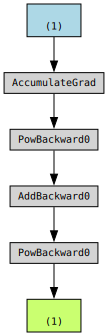

In [89]:
from torchviz import make_dot
x = torch.tensor([1.], requires_grad=True)

make_dot((x**2 + 1)**2)